#Actividad NLP - 1.0 - Creación de Diccionario
###Karla González Sánchez - A01514526

El objetivo de esta actividad es realizar un análisis de texto que involucra dos tareas principales: el conteo de palabras y la generación de una nube de palabras. Estas dos técnicas son ampliamente utilizadas en el procesamiento de lenguaje natural y la visualización de datos para comprender y representar la información contenida en un corpus de texto. Adicionalmente, se hizo un diccionario de palabras y la correción del texto con respecto al diccionario, utilizando el cálculo de distancia de strings mediante el algoritmo de Levenshtein.

Para esta tarea, se ha utilizado el libro "**On the Origin of Species by Means of Natural Selection**" escrito por Charles Darwin. El texto completo de este libro se descargó de la página de Project Gutenberg, una biblioteca digital de acceso gratuito a libros y documentos. El libro se encuentra disponible en el siguiente enlace: https://www.gutenberg.org/ebooks/22764

###Importar bibliotecas necesarias

In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')  # Descargar el tokenizador

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Abre y lee el archivo "darwin.txt" que contiene el texto que se desea analizar
with open("/content/drive/MyDrive/Colab Notebooks/NLP/darwin.txt", "r", encoding="utf-8") as file:
    text = file.read()

###Conteo de palabras e histograma

In [ ]:
# Divide el texto en palabras
words = nltk.word_tokenize(text)

# Elimina stop words y convierte todas las palabras a minúsculas:
stop_words = set(stopwords.words("english"))
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Calcula un histograma de las palabras para contar la frecuencia de cada palabra en el texto
fdist = FreqDist(filtered_words)

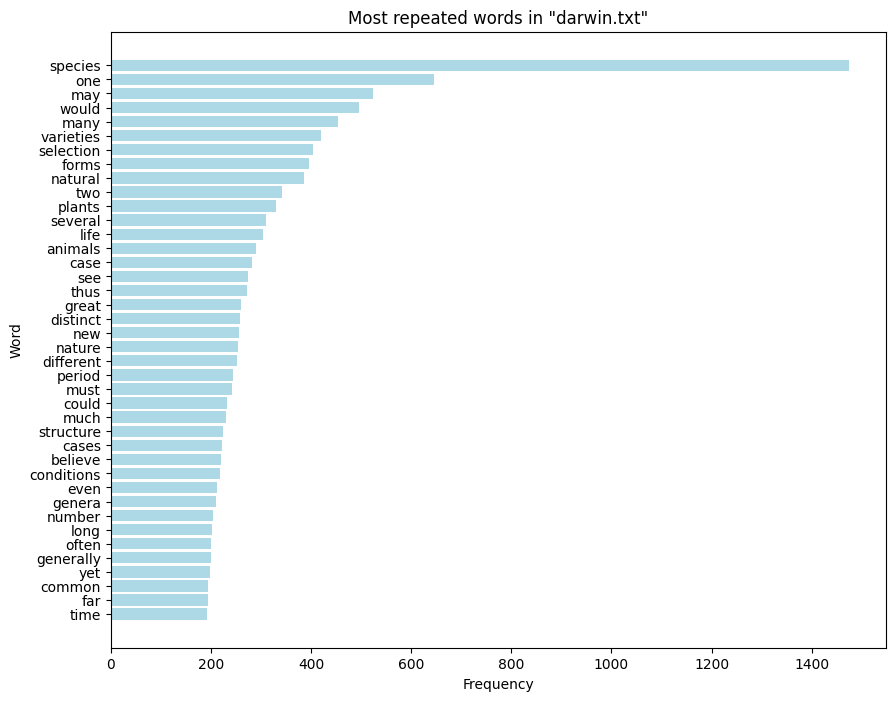

In [ ]:
# Obtiene las 40 palabras más comunes y sus frecuencias
most_common_words = fdist.most_common(40)

# Extrae las palabras y sus frecuencias para su representación en un histograma
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most repeated words in "darwin.txt"')
plt.gca().invert_yaxis()
plt.show()

###Nube de palabras

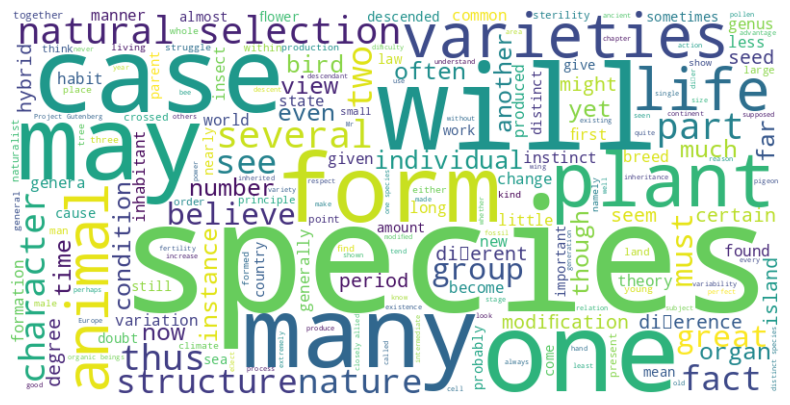

In [ ]:
# Nube de palabras basada en el texto original
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###Diccionario de palabras

In [ ]:
# Creación del diccionario
word_dict = {}
for word, frequency in most_common_words:
    word_dict[word] = frequency

# Imprime el diccionario y el número de repeticiones de cada palabra
for word, frequency in word_dict.items():
    print(f'Word: {word} - Frequency: {frequency}')

Word: species - Frequency: 1474
Word: one - Frequency: 645
Word: may - Frequency: 524
Word: would - Frequency: 495
Word: many - Frequency: 454
Word: varieties - Frequency: 421
Word: selection - Frequency: 404
Word: forms - Frequency: 396
Word: natural - Frequency: 387
Word: two - Frequency: 342
Word: plants - Frequency: 330
Word: several - Frequency: 311
Word: life - Frequency: 305
Word: animals - Frequency: 290
Word: case - Frequency: 282
Word: see - Frequency: 275
Word: thus - Frequency: 273
Word: great - Frequency: 260
Word: distinct - Frequency: 258
Word: new - Frequency: 257
Word: nature - Frequency: 255
Word: diﬀerent - Frequency: 253
Word: period - Frequency: 244
Word: must - Frequency: 243
Word: could - Frequency: 233
Word: much - Frequency: 230
Word: structure - Frequency: 224
Word: cases - Frequency: 223
Word: believe - Frequency: 221
Word: conditions - Frequency: 218
Word: even - Frequency: 212
Word: genera - Frequency: 211
Word: number - Frequency: 205
Word: long - Frequenc

 ### Corrección del texto utilizando el cálculo de distancia de strings mediante el algoritmo de Levenshtein

In [ ]:
pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.9 MB/s eta 0:00:00


In [ ]:
import Levenshtein

Esta función `correct_word` toma una palabra (`word`) y un diccionario (`dictionary`) como entrada y busca la palabra más cercana en el diccionario en función de la distancia de Levenshtein. La palabra más cercana se considera como la corrección. La función recorre todas las palabras del diccionario y calcula la distancia de Levenshtein entre la palabra dada y cada palabra del diccionario. Luego, se selecciona la palabra del diccionario con la menor distancia y se devuelve como la corrección.

In [ ]:
def correct_word(word, dictionary):
    correction = word
    min_distance = float('inf')

    for dict_word in dictionary.keys():
        distance = Levenshtein.distance(word, dict_word)

        if distance < min_distance:
            min_distance = distance
            correction = dict_word

    return correction

Se está aplicando la función `correct_word` a cada palabra en la lista `filtered_words`. Estas palabras provienen del texto original, y estamos buscando correcciones para cada una de ellas utilizando el diccionario `word_dict`. Las palabras corregidas se agregan a la lista `corrected_text`.

In [ ]:
corrected_text = []
for word in filtered_words:
    corrected_word = correct_word(word, word_dict)
    corrected_text.append(corrected_word)

Se crea un nuevo objeto `FreqDist` llamado `fdist_corrected` a partir de la lista de palabras corregidas en `corrected_text`. Esto nos permite contar la frecuencia de cada palabra corregida en el texto.

In [ ]:
fdist_corrected = FreqDist(corrected_text)
most_common_words_corrected = fdist_corrected.most_common(40)

Se genera un gráfico de barras que muestra las palabras corregidas más comunes y sus frecuencias en el texto corregido.

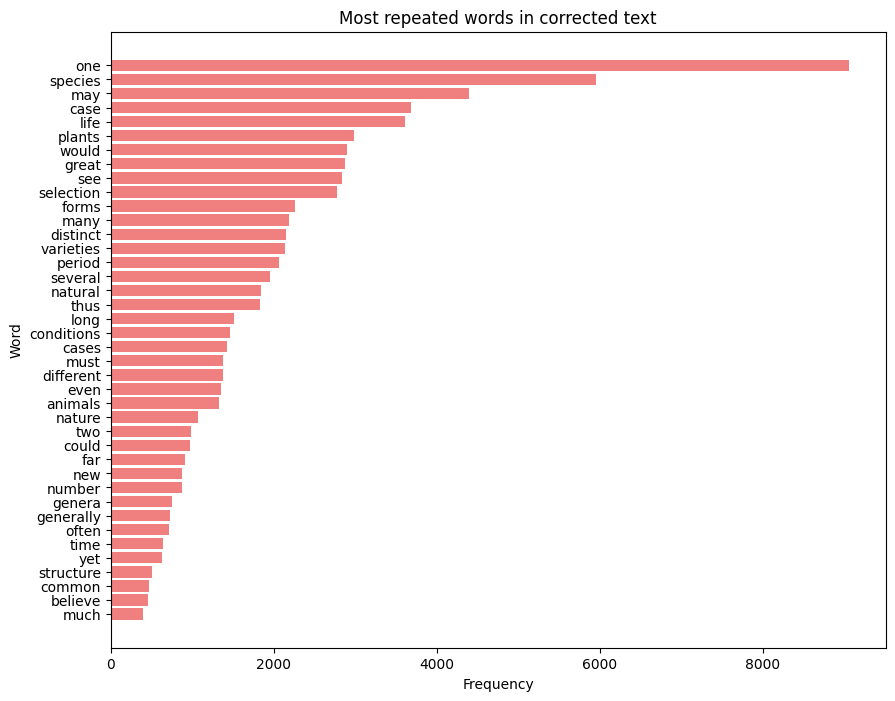

In [ ]:
# Se extraen las palabras y sus frecuencias a partir de las palabras corregidas más comunes.
words_corrected, frequencies_corrected = zip(*most_common_words_corrected)

plt.figure(figsize=(10, 8))
plt.barh(words_corrected, frequencies_corrected, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Most repeated words in corrected text')
plt.gca().invert_yaxis()
plt.show()